In [1]:
import pandas as pd
import numpy as np

In [2]:
accelerometer_data = pd.read_csv("./George_Vardakas_Accelerometer.csv")
gyroscope_data = pd.read_csv("./George_Vardakas_Gyroscope.csv")
heartrate_data = pd.read_csv("./George_Vardakas_HeartRate.csv")
activities = pd.read_csv("./activities.csv")

In [3]:
accelerometer_data["activityid"].value_counts()

104    71400
102    65400
101    51600
115    36000
107    34200
103    22200
106    16200
105     9000
Name: activityid, dtype: int64

In [4]:
activities

,ACTIVITY_ID,NAME
0,101,jogging
1,102,walking
2,103,standing
3,104,sitting
4,105,stairs
5,106,brushing teeth
6,107,eating
7,108,eating with fingers
8,109,drinking from cup
9,110,writing


In [5]:
chosen_activities = [101, 102, 103, 104, 105, 106, 107]
def create_df_accel_gyro(accelerometer_data, gyroscope_data, chosen_activities):
    accelerometer_data = accelerometer_data.loc[accelerometer_data["activityid"].isin(chosen_activities)]
    gyroscope_data = gyroscope_data.loc[gyroscope_data["activityid"].isin(chosen_activities)]
    accelerometer_data.reset_index(inplace=True)
    gyroscope_data.reset_index(inplace=True)
    df_accel_gyro = pd.DataFrame(accelerometer_data[["time", "sensordatax", "sensordatay", "sensordataz"]])
    df_accel_gyro.rename(columns={"time":"TIMESTAMP","sensordatax": "ACCEL_X", "sensordatay" : "ACCEL_Y", "sensordataz" : "ACCEL_Z"}, inplace=True)
    df_accel_gyro["GYRO_X"] = gyroscope_data["sensordatax"]
    df_accel_gyro["GYRO_Y"] = gyroscope_data["sensordatay"]
    df_accel_gyro["GYRO_Z"] = gyroscope_data["sensordataz"]
    df_accel_gyro["ACTIVITY_ID"] = gyroscope_data["activityid"]
    return df_accel_gyro

In [6]:
df_accel_gyro = create_df_accel_gyro(accelerometer_data, gyroscope_data, chosen_activities)

In [7]:
#df_accel_gyro.to_csv("./accel_gyro.csv", index=False)

In [8]:
df_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_accel_gyro["TIMESTAMP"])#, format=datetime_format)

In [9]:
#df_accel_gyro.loc[df_accel_gyro["TIMESTAMP"] > pd.Timestamp("2021-14-09")]
#df_accel_gyro["ACTIVITY_ID"].loc[df_accel_gyro["TIMESTAMP"] > pd.Timestamp("2021-01-14")].value_counts()

## Seperate users

In [10]:
# Set the days of the users
# Ted's days
ted_first_day = pd.Timestamp("2021-01-09")
# pragmatikh last date 2021-01-12
ted_last_day = pd.Timestamp("2021-01-13")

# Gregory's days
greg_first_day = pd.Timestamp("2021-01-13")
# pragmatikh last date 2021-01-15
greg_last_day = pd.Timestamp("2021-01-16")

# Kostakis' days
bro_first_day = pd.Timestamp("2021-01-19")
bro_last_day = pd.Timestamp("2021-01-27")

# Create separate dataframes
is_ted_days = (df_accel_gyro["TIMESTAMP"] >= ted_first_day) & (df_accel_gyro["TIMESTAMP"] < ted_last_day)
df_accel_gyro_ted = df_accel_gyro.loc[is_ted_days]

is_greg_days = (df_accel_gyro["TIMESTAMP"] >= greg_first_day) & (df_accel_gyro["TIMESTAMP"] < greg_last_day)
df_accel_gyro_greg = df_accel_gyro.loc[is_greg_days]

is_bro_days = (df_accel_gyro["TIMESTAMP"] >= bro_first_day) & (df_accel_gyro["TIMESTAMP"] < bro_last_day)
df_accel_gyro_bro = df_accel_gyro.loc[is_bro_days]

# Drop the data from my dataframe
df_accel_gyro.drop(df_accel_gyro_ted.index, inplace=True)
df_accel_gyro.drop(df_accel_gyro_greg.index, inplace=True)
df_accel_gyro.drop(df_accel_gyro_bro.index, inplace=True)

# Reset the indexs at dataframes
df_accel_gyro.reset_index(inplace=True, drop=True)
df_accel_gyro_ted.reset_index(inplace=True, drop=True)
df_accel_gyro_greg.reset_index(inplace=True, drop=True)
df_accel_gyro_bro.reset_index(inplace=True, drop=True)


In [11]:
df_accel_gyro

,TIMESTAMP,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,ACTIVITY_ID
0,2020-12-22 14:34:27.313,-1.224671,-1.425790,9.939831,-0.071375,0.041546,-0.052199,102
1,2020-12-22 14:34:27.413,-1.189954,-1.409030,9.937437,-0.042611,-0.007457,-0.086288,102
2,2020-12-22 14:34:27.513,-1.356357,-1.251008,9.604632,-0.068178,-0.005326,-0.080962,102
3,2020-12-22 14:34:27.613,-1.040312,-0.345972,9.513650,-0.050069,0.026632,-0.011718,102
4,2020-12-22 14:34:27.713,-1.016369,0.737436,9.024021,-0.256736,-0.025567,-0.162990,102
...,...,...,...,...,...,...,...,...
78595,2021-01-04 12:35:58.845,-10.697618,-0.593780,-0.585400,-1.665059,0.999249,1.198459,102
78596,2021-01-04 12:35:58.945,-8.230319,-1.581418,0.814053,-0.936396,1.281551,1.378493,102
78597,2021-01-04 12:35:59.045,-11.225556,-3.557892,0.290904,-2.021934,1.059970,1.968668,102
78598,2021-01-04 12:35:59.145,-11.067534,-4.108575,2.510397,-1.327359,0.753164,2.501317,102


In [12]:
df_accel_gyro_ted

,TIMESTAMP,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,ACTIVITY_ID
0,2021-01-09 14:43:09.402,-1.224671,1.891477,9.900326,0.005326,0.015979,0.005326,104
1,2021-01-09 14:43:09.502,-1.157631,2.068653,9.828497,-0.001065,0.017044,0.011718,104
2,2021-01-09 14:43:09.602,-1.242628,1.871125,9.674067,-0.007457,-0.003196,0.004261,104
3,2021-01-09 14:43:09.702,-1.301288,1.875914,9.805752,-0.027698,0.012783,0.012783,104
4,2021-01-09 14:43:09.802,-1.392270,2.315263,9.890748,0.221581,0.339829,0.043676,104
...,...,...,...,...,...,...,...,...
70195,2021-01-12 15:22:06.772,7.968145,-5.475706,-6.031178,-1.206981,-1.697018,-1.269834,105
70196,2021-01-12 15:22:06.872,8.886350,-0.702719,-3.562680,-0.809626,-1.102582,-1.316707,105
70197,2021-01-12 15:22:06.972,9.419076,-2.098581,-4.644893,0.049004,-1.071689,-2.306367,105
70198,2021-01-12 15:22:07.072,10.689239,-0.889473,-3.605777,-0.804298,-0.954506,-1.134541,105


<AxesSubplot:>

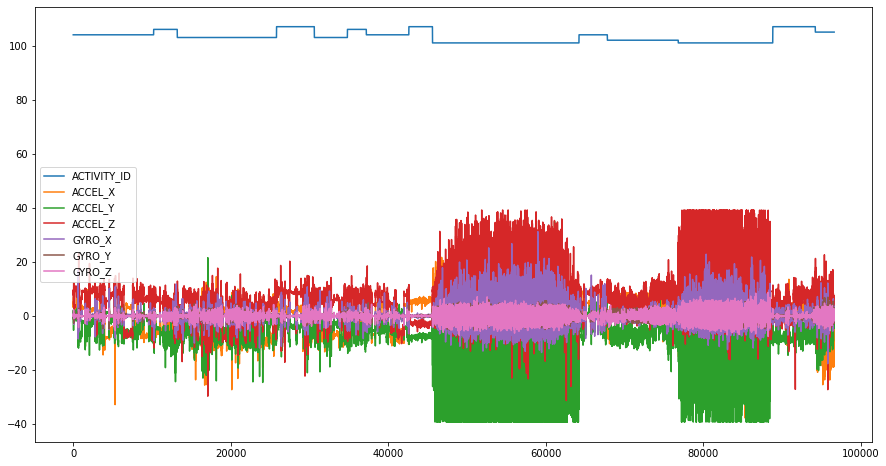

In [16]:
df_accel_gyro_greg[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z"]].plot(figsize=(15,8))

In [14]:
#df_accel_gyro_bro[["ACCEL_X" ,"ACCEL_Y" ,"ACCEL_Z" ,"GYRO_X" ,"GYRO_Y" ,"GYRO_Z"]].plot(figsize=(15, 8))
df_accel_gyro_bro

,TIMESTAMP,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,ACTIVITY_ID
0,2021-01-19 12:47:08.453,-1.039115,-3.010800,9.006063,-0.693508,-0.148076,-0.254605,104
1,2021-01-19 12:47:08.553,-1.013975,-3.263396,9.441822,-0.274846,-0.185361,-0.088419,104
2,2021-01-19 12:47:08.653,-0.908627,-2.972491,9.089864,0.060721,0.038350,0.043676,104
3,2021-01-19 12:47:08.753,-1.336005,-2.877917,9.633364,0.239692,0.235430,0.094810,104
4,2021-01-19 12:47:08.853,-1.142069,-2.935380,9.395133,-0.069243,-0.101203,0.021305,104
...,...,...,...,...,...,...,...,...
24595,2021-01-25 15:36:55.448,-13.640182,-1.778946,0.466883,-0.697769,-0.052199,0.366462,102
24596,2021-01-25 15:36:55.548,-10.076304,-1.488041,-0.494417,1.232548,-0.585913,-0.076701,102
24597,2021-01-25 15:36:55.648,-8.272219,-0.741028,0.000000,1.232548,-0.585913,-0.076701,102
24598,2021-01-25 15:36:55.748,-6.857203,-1.620923,0.568640,1.232548,-0.585913,-0.076701,102


In [15]:
df_accel_gyro.to_csv("./accel_gyro_Geo.csv", index=False)
df_accel_gyro_ted.to_csv("./accel_gyro_Ted.csv", index=False)
df_accel_gyro_greg.to_csv("./accel_gyro_Gregory.csv", index=False)
df_accel_gyro_bro.to_csv("./accel_gyro_Bro.csv", index=False)